# 如何创建直方图

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")

## 1. 频数表

直方图(histogram)是探索数值型变量分布的方法，例如单峰还是双峰分布，是否接近钟型分布，左偏还是右偏等。

在创建直方图之前，首先要了解一个概念：频数表。

什么是频数表(frequency table)？

给定一个数值变量，将变量的极差（最大值与最小值的差）均匀地分割为多个等距分段，然后统计落入每个分段的数值个数。

然我们看一个具体的例子。

In [96]:
# 生成数值变量，假设服从标准正态分布
np.random.seed(123)
x = np.random.randn(100)

# 定义分段的数量
bins = 10

# 将变量均匀地分割为多个等距分段
breaks = np.linspace(np.min(x), np.max(x), bins)

# 统计落入每个分段的数值个数
counts = {}
for i in range(len(breaks) - 1):
    left, right = breaks[i], breaks[i+1]
    label = f"({left:.2f}, {right:.2f}]"
    count = 0
    for val in x:
        if val > left and val <= right:
            count += 1
    counts.update({label: count})

counts

{'(-2.80, -2.22]': 1,
 '(-2.22, -1.65]': 3,
 '(-1.65, -1.07]': 14,
 '(-1.07, -0.49]': 17,
 '(-0.49, 0.09]': 18,
 '(0.09, 0.66]': 12,
 '(0.66, 1.24]': 19,
 '(1.24, 1.82]': 10,
 '(1.82, 2.39]': 5}

首先我们生成了100个标准正态变量，然后划分为10个等距的分段，然后统计了落入每个分段的数值个数。

例如落入'(-2.8, -2.22]'分段的个数有1个，而落入'(-0.49, 0.09]'分段的个数有18个，结果符合预期。

有更简单的方法实现频数表，调用pd.cut()函数。

In [97]:
pd.cut(pd.Series(x), bins=breaks, precision=2).value_counts()

(0.66, 1.24]      19
(-0.49, 0.085]    18
(-1.07, -0.49]    17
(-1.65, -1.07]    14
(0.085, 0.66]     12
(1.24, 1.82]      10
(1.82, 2.39]       5
(-2.22, -1.65]     3
(-2.8, -2.22]      1
dtype: int64

## 2. 直方图

直方图是频数表的可视化表达，x轴是等距，y轴是频数统计，通常用于探索数值变量的分布。

调用matplotlib.pyplot的hist()可以实现直方图。

Text(0.5, 1.0, 'Simple Histogram')

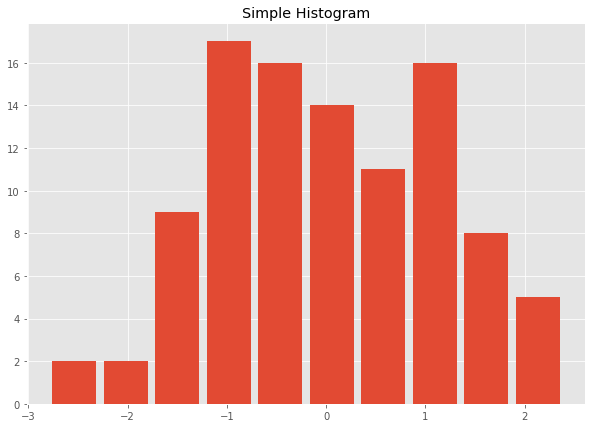

In [98]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(x, bins=10, rwidth=0.85)
ax.set_title("Simple Histogram")

如果数据集有多个数值变量，可以在同一幅图中对比它们的分布。

当在同一幅图中创建多个直方图时，需要调整一下柱子的样式，才能得到较好的视觉效果。

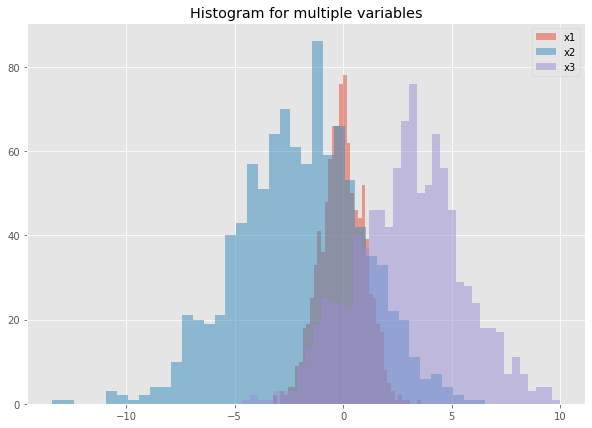

In [99]:
np.random.seed(123)

x1 = np.random.normal(0, 1, size=1000)
x2 = np.random.normal(-2, 3, size=1000)
x3 = np.random.normal(3, 2.5, size=1000)

# 当在同一幅图表中创建多个直方图，最好使用'stepfilled'，并调整透明度
kwargs = {
    "bins": 40,
    "histtype": "stepfilled",
    "alpha": 0.5
}

fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(x1, label="x1", **kwargs)
ax.hist(x2, label="x2", **kwargs)
ax.hist(x3, label="x3", **kwargs)
ax.set_title("Histogram for multiple variables")
ax.legend()

## 3. 密度图

密度图是与直方图密切相关的概念，它用一条连续的曲线表示变量的分布，可以理解为直方图的”平滑版本“。

统计学经典理论假设样本数据来源于总体，而总体数据会服从某个分布（如正态分布，二项式分布等）。密度图采用”核密度统计量“来估计代表总体的随机变量的概率密度函数。

密度估计的课题比较复杂，这里不做深入。为了实现密度图，需要先创建一个数据框(pd.DataFrame)，然后调用df.plot.density()。

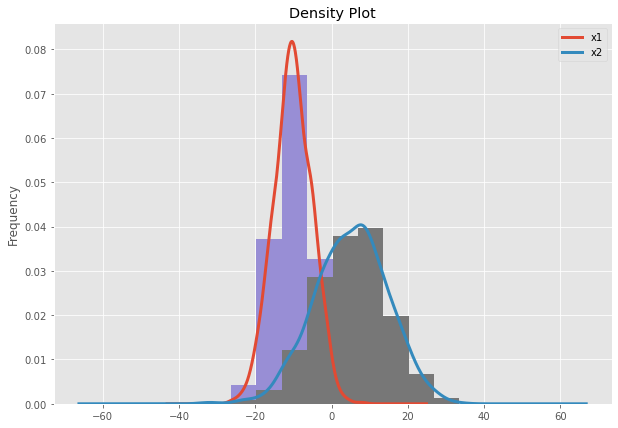

In [100]:
np.random.seed(123)

x1 = np.random.normal(-10, 5, 1000)
x2 = np.random.normal(5, 10, 1000)
df = pd.DataFrame({"x1": x1, "x2": x2})

fig, ax = plt.subplots(figsize=(10, 7))
df.plot(kind="density", ax=ax, linewidth=3, title="Density Plot")
df.plot(kind="hist", ax=ax, density=True, legend=False)